In [58]:
# Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller

# Import Data
#data01 = pd.read_csv('Data_User_Modeling_Dataset_Testing.csv')
#data02 = pd.read_csv('Data_User_Modeling_Dataset_Training.csv')

# Combine
#frames = [data01, data02]
#result = pd.concat(frames).drop_duplicates().reset_index(drop = True)

# Format data
#result.to_csv(r'result.csv', index = False)

In [2]:
dataset = pd.read_csv('result.csv')
print(dataset.head(20))

     STG   SCG   STR   LPR   PEG       UNS        Date
0   0.00  0.10  0.50  0.26  0.05  Very Low  11/26/2019
1   0.05  0.05  0.55  0.60  0.14       Low  11/27/2019
2   0.08  0.18  0.63  0.60  0.85      High  11/28/2019
3   0.20  0.20  0.68  0.67  0.85      High  11/29/2019
4   0.22  0.22  0.90  0.30  0.90      High  11/30/2019
5   0.14  0.14  0.70  0.50  0.30       Low   12/1/2019
6   0.16  0.16  0.80  0.50  0.50    Middle   12/2/2019
7   0.12  0.12  0.75  0.68  0.15       Low   12/3/2019
8   0.20  0.20  0.88  0.77  0.80      High   12/4/2019
9   0.16  0.25  0.01  0.10  0.07  Very Low   12/5/2019
10  0.11  0.29  0.20  0.05  0.66    Middle   12/6/2019
11  0.18  0.26  0.05  0.40  0.04  Very Low   12/7/2019
12  0.21  0.32  0.25  0.50  0.80      High   12/8/2019
13  0.13  0.28  0.18  0.75  0.32    Middle   12/9/2019
14  0.23  0.29  0.45  0.18  0.88      High  12/10/2019
15  0.10  0.27  0.35  0.45  0.05  Very Low  12/11/2019
16  0.22  0.31  0.42  0.88  0.80      High  12/12/2019
17  0.00  

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
 6   Date    403 non-null    object 
dtypes: float64(5), object(2)
memory usage: 22.2+ KB


In [4]:
# Cleaning data

dataset = dataset.drop(["SCG"],axis=1)

In [5]:
# Normalization

dataset["Date"] = dataset["Date"].astype('datetime64[ns]')

dataset.dtypes

STG            float64
STR            float64
LPR            float64
PEG            float64
 UNS            object
Date    datetime64[ns]
dtype: object

In [21]:
dataset_groupby_PEG = dataset.groupby("PEG")
dataset_groupby_PEG["PEG"].count()

PEG
0.00    2
0.01    3
0.03    2
0.04    2
0.05    4
       ..
0.95    2
0.96    1
0.97    1
0.98    2
0.99    1
Name: PEG, Length: 89, dtype: int64

In [22]:
dataset_groupby_PEG[["PEG", "STG", "STR"]].mean()

,PEG,STG,STR
PEG,,,
0.00,0.00,0.045000,0.1550
0.01,0.01,0.113333,0.4600
0.03,0.03,0.224000,0.5050
0.04,0.04,0.147500,0.3500
0.05,0.05,0.060000,0.4175
...,...,...,...
0.95,0.95,0.255000,0.8800
0.96,0.96,0.310000,0.2900
0.97,0.97,0.900000,0.2400


In [23]:
dataset.sort_values(by = ["PEG", "LPR"])

,STG,STR,LPR,PEG,UNS,Date
145,0.00,0.00,0.00,0.00,very_low,2020-04-19
183,0.09,0.31,0.26,0.00,very_low,2020-05-27
49,0.10,0.51,0.10,0.01,Very Low,2020-01-14
152,0.15,0.34,0.40,0.01,very_low,2020-04-26
205,0.09,0.53,0.75,0.01,Low,2020-06-18
...,...,...,...,...,...,...
78,0.31,0.29,0.31,0.96,High,2020-02-12
125,0.90,0.24,0.30,0.97,High,2020-03-30
116,0.80,0.23,0.29,0.98,High,2020-03-21
89,0.31,0.69,0.30,0.98,High,2020-02-23


In [24]:
# No Redudance ? ? ?

dataset.isna().sum()

STG     0
STR     0
LPR     0
PEG     0
 UNS    0
Date    0
dtype: int64

             STG   STR   LPR   PEG       UNS
Date                                        
2019-11-26  0.00  0.50  0.26  0.05  Very Low
2019-11-27  0.05  0.55  0.60  0.14       Low
2019-11-28  0.08  0.63  0.60  0.85      High
2019-11-29  0.20  0.68  0.67  0.85      High
2019-11-30  0.22  0.90  0.30  0.90      High


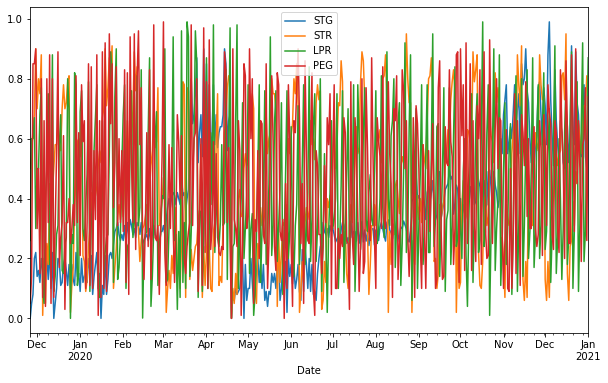

<Figure size 432x288 with 0 Axes>

In [7]:
# Visualization

x = dataset[['PEG', 'STG', 'STR', 'LPR', 'Date']]
x = dataset.set_index('Date')
print(x.head(5))

x.plot(kind='line', figsize=(10, 6))
plt.show()
plt.savefig('01.jpg')

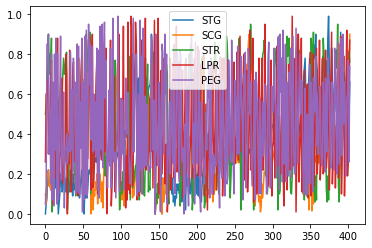

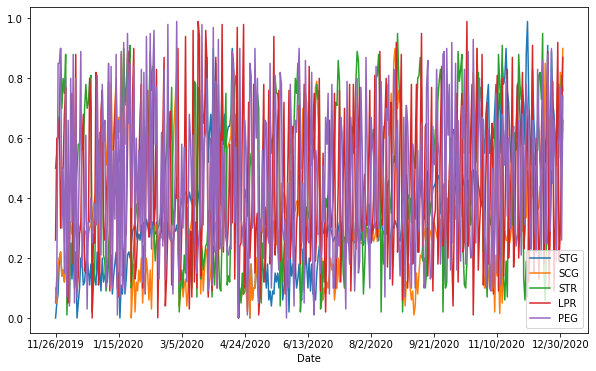

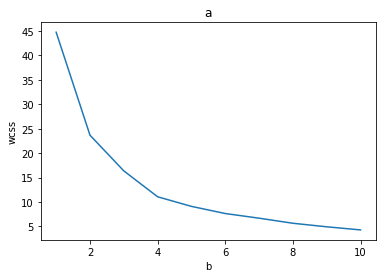

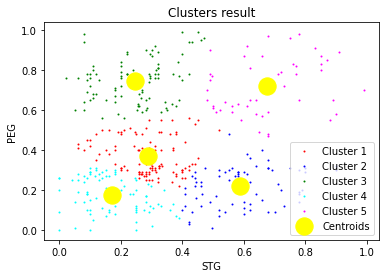

In [9]:
import image



dataframe01 = pd.read_csv("result.csv")
dataframe01.plot()
plt.savefig('pict//save02.jpg')
plt.show()

X = dataframe01.iloc[:, [0, 3]].values

y = dataframe01[['Date','PEG','STG','STR']]
y = dataframe01.set_index('Date')
y.plot(kind='line', figsize=(10, 6))
plt.show()

from sklearn.cluster import KMeans
wcss = []
for i in(range(1, 11)):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('a')
plt.xlabel('b')
plt.ylabel('wcss')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters result')
plt.xlabel('STG')
plt.ylabel('PEG')
plt.legend()
plt.show()



In [10]:
# Clustering

dataframe01['STG'].describe()

count    403.000000
mean       0.353141
std        0.212018
min        0.000000
25%        0.200000
50%        0.300000
75%        0.480000
max        0.990000
Name: STG, dtype: float64

In [11]:
dataframe01.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
Date    0
dtype: int64

In [53]:
dataframe02 = dataframe01.iloc[:, [0,4]]
dataframe02.head()

,STG,PEG
0,0.00,0.05
1,0.05,0.14
2,0.08,0.85
3,0.20,0.85
4,0.22,0.90


In [54]:
dataframe02_array=np.array(dataframe02)
print(dataframe02_array)

[[0.    0.05 ]
 [0.05  0.14 ]
 [0.08  0.85 ]
 [0.2   0.85 ]
 [0.22  0.9  ]
 [0.14  0.3  ]
 [0.16  0.5  ]
 [0.12  0.15 ]
 [0.2   0.8  ]
 [0.16  0.07 ]
 [0.11  0.66 ]
 [0.18  0.04 ]
 [0.21  0.8  ]
 [0.13  0.32 ]
 [0.23  0.88 ]
 [0.1   0.05 ]
 [0.22  0.8  ]
 [0.    0.07 ]
 [0.05  0.32 ]
 [0.1   0.55 ]
 [0.2   0.89 ]
 [0.19  0.17 ]
 [0.11  0.27 ]
 [0.12  0.32 ]
 [0.18  0.61 ]
 [0.2   0.03 ]
 [0.16  0.32 ]
 [0.11  0.32 ]
 [0.18  0.4  ]
 [0.1   0.25 ]
 [0.18  0.3  ]
 [0.13  0.38 ]
 [0.11  0.31 ]
 [0.22  0.81 ]
 [0.14  0.32 ]
 [0.15  0.62 ]
 [0.09  0.21 ]
 [0.2   0.78 ]
 [0.12  0.59 ]
 [0.14  0.66 ]
 [0.16  0.1  ]
 [0.12  0.32 ]
 [0.2   0.85 ]
 [0.16  0.11 ]
 [0.21  0.84 ]
 [0.08  0.1  ]
 [0.14  0.56 ]
 [0.18  0.33 ]
 [0.22  0.88 ]
 [0.1   0.01 ]
 [0.15  0.66 ]
 [0.    0.07 ]
 [0.11  0.89 ]
 [0.08  0.1  ]
 [0.21  0.92 ]
 [0.08  0.09 ]
 [0.13  0.31 ]
 [0.21  0.95 ]
 [0.22  0.65 ]
 [0.2   0.85 ]
 [0.25  0.37 ]
 [0.29  0.52 ]
 [0.3   0.84 ]
 [0.32  0.31 ]
 [0.28  0.6  ]
 [0.26  0.32 ]
 [0.28  0.

In [55]:
minmax = preprocessing.MinMaxScaler().fit_transform(dataframe02)

In [56]:
minmax

array([[0.        , 0.05050505],
       [0.05050505, 0.14141414],
       [0.08080808, 0.85858586],
       [0.2020202 , 0.85858586],
       [0.22222222, 0.90909091],
       [0.14141414, 0.3030303 ],
       [0.16161616, 0.50505051],
       [0.12121212, 0.15151515],
       [0.2020202 , 0.80808081],
       [0.16161616, 0.07070707],
       [0.11111111, 0.66666667],
       [0.18181818, 0.04040404],
       [0.21212121, 0.80808081],
       [0.13131313, 0.32323232],
       [0.23232323, 0.88888889],
       [0.1010101 , 0.05050505],
       [0.22222222, 0.80808081],
       [0.        , 0.07070707],
       [0.05050505, 0.32323232],
       [0.1010101 , 0.55555556],
       [0.2020202 , 0.8989899 ],
       [0.19191919, 0.17171717],
       [0.11111111, 0.27272727],
       [0.12121212, 0.32323232],
       [0.18181818, 0.61616162],
       [0.2020202 , 0.03030303],
       [0.16161616, 0.32323232],
       [0.11111111, 0.32323232],
       [0.18181818, 0.4040404 ],
       [0.1010101 , 0.25252525],
       [0.

In [57]:
dataframe02

,STG,PEG
0,0.00,0.05
1,0.05,0.14
2,0.08,0.85
3,0.20,0.85
4,0.22,0.90
...,...,...
398,0.61,0.58
399,0.78,0.60
400,0.54,0.77
401,0.50,0.26


In [58]:
dataframe03 = pd.DataFrame(minmax, index=dataframe02.index, columns=dataframe02.columns)
dataframe03

,STG,PEG
0,0.000000,0.050505
1,0.050505,0.141414
2,0.080808,0.858586
3,0.202020,0.858586
4,0.222222,0.909091
...,...,...
398,0.616162,0.585859
399,0.787879,0.606061
400,0.545455,0.777778
401,0.505051,0.262626


In [65]:
KMeans(n_clusters=2).fit(dataframe03).score(dataframe03)

scr=[]
for i in range (1,20):
    score = KMeans(n_clusters=i).fit(dataframe03).score(dataframe03)
    print(score)
    scr.append(score)

-47.62828667151248
-23.520000605766256
-15.489243640906647
-10.727174758283322
-8.291516159517855
-6.863450505668977
-5.728545452276213
-4.923854305679821
-4.1832391884748334
-3.608875032574773
-3.048854532358651
-2.710189032621801
-2.5361916862475495
-2.319614556510355
-2.1465566630565314
-2.0328970608190002
-1.9524159921843682
-1.81464487595609
-1.7436718896387262


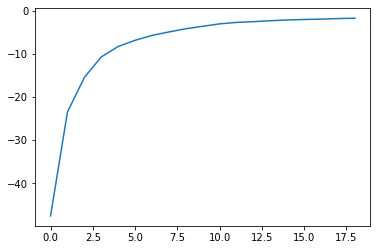

In [67]:
plt.plot(scr)

In [68]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dataframe03)

KMeans(n_clusters=5)

In [69]:
kmeans.labels_

array([0, 0, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 0, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 2, 2, 0, 0, 4, 0,
       4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 0, 4, 2, 4, 0, 2, 4, 0, 2, 0,
       2, 0, 4, 0, 4, 0, 4, 2, 0, 4, 0, 4, 4, 2, 4, 0, 0, 0, 2, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 2, 4, 0, 0, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2,
       3, 3, 0, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 0, 4, 0, 0, 0, 2, 2, 0, 0,
       4, 4, 0, 0, 4, 2, 4, 0, 0, 0, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 4, 2,
       0, 0, 4, 4, 0, 0, 0, 0, 2, 0, 4, 2, 0, 0, 2, 2, 4, 4, 2, 0, 2, 0,
       4, 2, 0, 0, 2, 4, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 4, 0, 2, 4,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 0, 4, 0, 0,
       4, 2, 0, 0, 4, 2, 0, 0, 2, 2, 2, 0, 4, 0, 0, 2, 4, 2, 2, 0, 2, 2,
       4, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 0,
       3, 2, 3, 2, 2, 3, 0, 0, 4, 4, 0, 0, 3, 2, 2,

In [70]:
dataframe03['cluster']=kmeans.labels_
dataframe03

,STG,PEG,cluster
0,0.000000,0.050505,0
1,0.050505,0.141414,0
2,0.080808,0.858586,4
3,0.202020,0.858586,4
4,0.222222,0.909091,4
...,...,...,...
398,0.616162,0.585859,1
399,0.787879,0.606061,1
400,0.545455,0.777778,1
401,0.505051,0.262626,3


(array([131.,   0.,  47.,   0.,   0.,  85.,   0.,  74.,   0.,  66.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

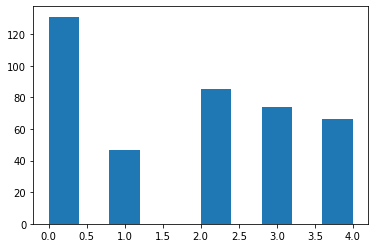

In [71]:
plt.hist(dataframe03['cluster'])

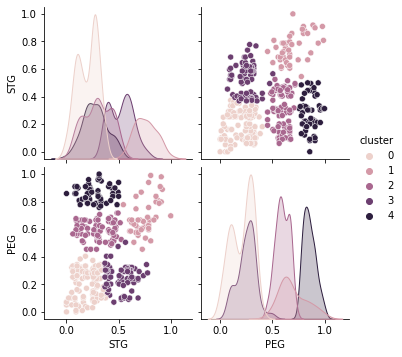

In [72]:
sns.pairplot(dataframe03, hue='cluster')

In [49]:
# Forecasting

dataframe04 = dataframe01[['Date', 'PEG']]
dataframe04

,Date,PEG
0,11/26/2019,0.05
1,11/27/2019,0.14
2,11/28/2019,0.85
3,11/29/2019,0.85
4,11/30/2019,0.90
...,...,...
398,12/28/2020,0.58
399,12/29/2020,0.60
400,12/30/2020,0.77
401,12/31/2020,0.26


In [37]:
dataframe04.isna().sum()

Date    0
PEG     0
dtype: int64

In [50]:
con = dataframe04['Date']
dataframe04['Date'] = pd.to_datetime(dataframe04['Date'])
dataframe04.set_index('Date', inplace=True)
dataframe04.index

<ipython-input-50-6460387f23e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe04['Date'] = pd.to_datetime(dataframe04['Date'])


DatetimeIndex(['2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=403, freq=None)

In [51]:
ts = dataframe04['PEG']
ts.head()

Date
2019-11-26    0.05
2019-11-27    0.14
2019-11-28    0.85
2019-11-29    0.85
2019-11-30    0.90
Name: PEG, dtype: float64

In [52]:
ts['2020-12-20']

0.88

In [53]:
ts[datetime(2020, 12, 20)]

0.88

In [54]:
ts['2019-11-26' : '2021-01-01']

Date
2019-11-26    0.05
2019-11-27    0.14
2019-11-28    0.85
2019-11-29    0.85
2019-11-30    0.90
              ... 
2020-12-28    0.58
2020-12-29    0.60
2020-12-30    0.77
2020-12-31    0.26
2021-01-01    0.74
Name: PEG, Length: 403, dtype: float64

In [55]:
ts[:'2019-12-20']

Date
2019-11-26    0.05
2019-11-27    0.14
2019-11-28    0.85
2019-11-29    0.85
2019-11-30    0.90
2019-12-01    0.30
2019-12-02    0.50
2019-12-03    0.15
2019-12-04    0.80
2019-12-05    0.07
2019-12-06    0.66
2019-12-07    0.04
2019-12-08    0.80
2019-12-09    0.32
2019-12-10    0.88
2019-12-11    0.05
2019-12-12    0.80
2019-12-13    0.07
2019-12-14    0.32
2019-12-15    0.55
2019-12-16    0.89
2019-12-17    0.17
2019-12-18    0.27
2019-12-19    0.32
2019-12-20    0.61
Name: PEG, dtype: float64

In [56]:
ts['2019']

Date
2019-11-26    0.05
2019-11-27    0.14
2019-11-28    0.85
2019-11-29    0.85
2019-11-30    0.90
2019-12-01    0.30
2019-12-02    0.50
2019-12-03    0.15
2019-12-04    0.80
2019-12-05    0.07
2019-12-06    0.66
2019-12-07    0.04
2019-12-08    0.80
2019-12-09    0.32
2019-12-10    0.88
2019-12-11    0.05
2019-12-12    0.80
2019-12-13    0.07
2019-12-14    0.32
2019-12-15    0.55
2019-12-16    0.89
2019-12-17    0.17
2019-12-18    0.27
2019-12-19    0.32
2019-12-20    0.61
2019-12-21    0.03
2019-12-22    0.32
2019-12-23    0.32
2019-12-24    0.40
2019-12-25    0.25
2019-12-26    0.30
2019-12-27    0.38
2019-12-28    0.31
2019-12-29    0.81
2019-12-30    0.32
2019-12-31    0.62
Name: PEG, dtype: float64

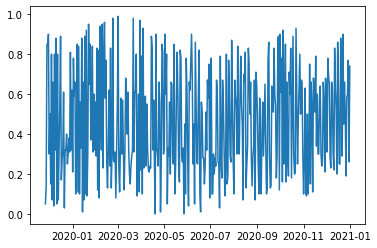

In [57]:
%matplotlib inline

plt.plot(ts)

In [59]:
def test_stationarity(timeseries):
    
#Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

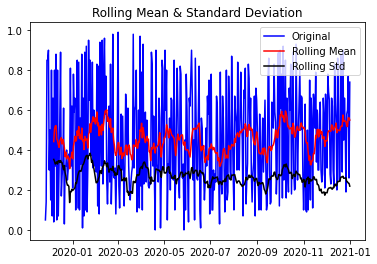

Results of Dickey-Fuller Test:
Test Statistic                -1.038070e+01
p-value                        2.142865e-18
#Lags Used                     3.000000e+00
Number of Observations Used    3.990000e+02
Critical Value (1%)           -3.446846e+00
Critical Value (5%)           -2.868811e+00
Critical Value (10%)          -2.570643e+00
dtype: float64


In [60]:
test_stationarity(ts)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


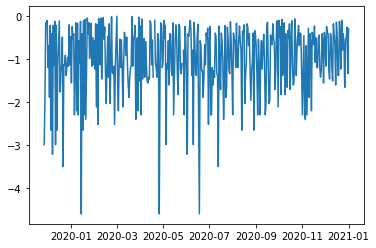

In [61]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [63]:
moving_avg = ts.rolling(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

ValueError: window must be an integer